#### NCSU GIS 714: Geospatial Computation and Simulations

## Spatio-temporal data handling and visualization in GRASS GIS

Contents:
* Visualization of solar radiation: compute and visualize solar radiation dynamics using NC State Centennial Campus lidar data

Additional Resources:
* [GRASS GIS overview and manual](https://grass.osgeo.org/grass-stable/manuals/index.html)
* [GRASS book](http://www.grassbook.org/)

## Visualization of Solar Radiation

### Start GRASS GIS
Start GRASS with location NC_spm_temporal_workshop and mapset centennial.

In [1]:
# import subprocess
import sys
from datetime import datetime


"""
# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# shell_setting = True
# FOR MAC/LINUX
grass_call = "grass"
shell_setting = False

sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=shell_setting).strip()
)
"""

# Configuration on my laptop
sys.path.append('/Applications/GRASS-8.4.app/Contents/Resources/etc/python')

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("../data", "NC_spm_temporal_workshop", "centennial")

Set computational region to the elevation raster.

In [2]:
gs.run_command("g.region", raster="elev_lid_small")

We will compute solar radiation during a day for a part of North Carolina State University Centennial Campus. Then we will visualize the change of solar radiation as a 3D animation. If you don't have r.sun.hourly, download it:

In [3]:
gs.run_command("g.extension", extension="r.sun.hourly")

Your branch is up to date with 'origin/grass8'.


Convert the today's date (or any other date) to day of year.

In [4]:
day = datetime.now().timetuple().tm_yday
year = "2022"
# or for an arbitrary day:
# day = datetime(2014, 6, 21).timetuple().tm_yday
# year = "2014"

Compute beam irradiance raster series (be patient) with the following command. The time series is automatically registered into a space-time raster dataset.

In [5]:
gs.run_command('r.sun.hourly', flags='t', elevation='elev_lid_small',
                start_time='6', end_time='20', day=day, year=year,
                beam_rad_basename='beam')

Set custom color table for just created dataset "beam":

In [6]:
gs.run_command("t.rast.colors", input="beam", rules="./rules.txt")

Visualize sunrise in 3D:

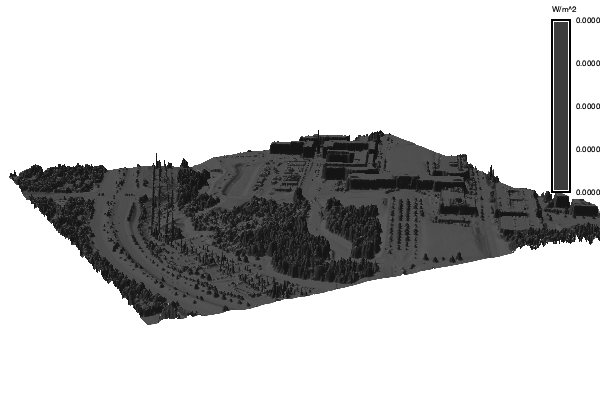

In [7]:
sunrise_viz = gj.Map3D()
sunrise_viz.render(elevation_map="elev_lid_small", color_map="beam_06.00", perspective=20, height=600, position="0.7,0.1", resolution_fine=1)
sunrise_viz.overlay.d_legend(raster="beam_06.00", at=(52,95,92,95), title="W/m^2")
sunrise_viz.show()

Create animation of solar radiation over day:

In [8]:
solar_map = gj.TimeSeriesMap(width=800, height=500)
solar_map.add_raster_series("beam")
solar_map.d_legend(color="black", at=(5,85,0,3), title="W/m^2")
solar_map.show()

### Additional Information
* [Website](https://github.com/ncsu-geoforall-lab/geospatial-simulations-course)
    
* [Computing Help](https://help.ncsu.edu/)
    
* [GIST Home](https://geospatial.ncsu.edu/)
    
* [Disclaimer](https://www.ncsu.edu/policies/prr-disclaimer.php)
    
* [Accessibility](https://oit.ncsu.edu/itaccess)

* License: 2018 [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/)
  
* [NCSU GeoForAll Lab](https://geospatial.ncsu.edu/geoforall/)